Clase 4
====

Objetivo:

* Introducción a cobrapy

La documentación oficial de cobra se encuentra disponible [aquí](http://cobrapy.readthedocs.io/en/0.4.0/getting_started.html). Hoy veremos los comandos escenciales de cobra y construiremos nuestra propia red metábolica.

Comandos básicos
--------------

Comezaremos cargado cobra y determinando que version está instalada (esto es útil para consultar la documentación adecuada; diferentes versiones de cobra tienen diferentes documentaciones)

In [5]:
import cobra
cobra.__version__

'0.22.1'

A modo de ejemplo importaremos la red metabólica de Escherichia coli

In [6]:
import cobra.test

# "ecoli" and "salmonella" are also valid arguments
model = cobra.test.create_test_model("ecoli")

Veamos cuantas reacciones y metabolitos tiene "ecoli"

In [7]:
print(len(model.reactions))
print(len(model.metabolites))

2583
1805


Podemos inspeccionar reacciones individualmente. Por ejemplo, para ver la reacción 30:

In [9]:
print( model.reactions[10].reaction )

14glucan_e --> 


Ver las primeras 10 reacciones:

In [10]:
for i in range(10):
    print( model.reactions[i] )

DM_4crsol_c: 4crsol_c --> 
DM_5drib_c: 5drib_c --> 
DM_aacald_c: aacald_c --> 
DM_amob_c: amob_c --> 
DM_mththf_c: mththf_c --> 
DM_oxam_c: oxam_c --> 
BIOMASS_Ec_iJO1366_WT_53p95M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 54.119975 atp_c + 0.000116 bmocogdp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 48.752916 h2o_c + 0.000223 hemeO_c + 0.092056 his__

También podemos identificar una reacción por su nombre:

In [11]:
pgi = model.reactions.get_by_id("PGI")
print(pgi)
print(pgi.reaction)
print(pgi.name)


print(pgi.lower_bound, "< pgi <", pgi.upper_bound)

udcpdp = model.metabolites.get_by_id("udcpdp_c")
print(udcpdp.reactions) 
print(udcpdp.formula) 

PGI: g6p_c <=> f6p_c
g6p_c <=> f6p_c
Glucose-6-phosphate isomerase
-1000.0 < pgi < 1000.0
frozenset({<Reaction MPTG at 0x7fd2b3f3ad00>, <Reaction BIOMASS_Ec_iJO1366_core_53p95M at 0x7fd2b4c2e430>, <Reaction MPTG2 at 0x7fd2b3f3ab50>, <Reaction UDCPDP at 0x7fd2b3a29c70>, <Reaction UDCPDPS at 0x7fd2b3a14bb0>, <Reaction BIOMASS_Ec_iJO1366_WT_53p95M at 0x7fd2b4c2e7c0>})
C55H89O7P2


Podemos verificar el balance de masa de una reacción:

In [14]:
print( "Balance de masa original" )
print(pgi.check_mass_balance() )
print(pgi.reaction )

print("Veamos que pasa con el balance de masa si ahora agregamos un metabolito a la reacción" )
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
pgi.reaction
print(pgi.check_mass_balance())
print(pgi.reaction)

Balance de masa original
{}
g6p_c <=> f6p_c
Veamos que pasa con el balance de masa si ahora agregamos un metabolito a la reacción
{'charge': -1.0, 'H': -1.0}
g6p_c + h_c <=> f6p_c


In [17]:
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): 2})
print( pgi.reaction )

g6p_c <=> f6p_c + 3 h_c


In [18]:
print( pgi.check_mass_balance() )


{'charge': 3.0, 'H': 3.0}


Tambien podemos ver cuales son las reacciones en las que un determinado metabólito está involucrado:

In [19]:
for rxn in model.metabolites.get_by_id("atp_c").reactions:
    print( rxn, rxn.reaction)

PGP180abcpp: atp_c + h2o_c + pgp180_c --> adp_c + h_c + pgp180_p + pi_c atp_c + h2o_c + pgp180_c --> adp_c + h_c + pgp180_p + pi_c
ASNS2: asp__L_c + atp_c + nh4_c --> amp_c + asn__L_c + h_c + ppi_c asp__L_c + atp_c + nh4_c --> amp_c + asn__L_c + h_c + ppi_c
PANTS: ala_B_c + atp_c + pant__R_c --> amp_c + h_c + pnto__R_c + ppi_c ala_B_c + atp_c + pant__R_c --> amp_c + h_c + pnto__R_c + ppi_c
SERASr: atp_c + h_c + ser__L_c <=> ppi_c + seramp_c atp_c + h_c + ser__L_c <=> ppi_c + seramp_c
PA140abcpp: atp_c + h2o_c + pa140_c --> adp_c + h_c + pa140_p + pi_c atp_c + h2o_c + pa140_c --> adp_c + h_c + pa140_p + pi_c
2AGPEAT160: 2agpe160_c + atp_c + hdca_c --> amp_c + pe160_c + ppi_c 2agpe160_c + atp_c + hdca_c --> amp_c + pe160_c + ppi_c
HEX1: atp_c + glc__D_c --> adp_c + g6p_c + h_c atp_c + glc__D_c --> adp_c + g6p_c + h_c
CRNDCAL2: atp_c + coa_c + crn__D_c --> adp_c + crnDcoa_c + pi_c atp_c + coa_c + crn__D_c --> adp_c + crnDcoa_c + pi_c
HEX7: atp_c + fru_c --> adp_c + f6p_c + h_c atp_c + fru

Simulación de flujos metabólicos
================================

Para simular los flujos metabólicos optimizacmos los flujos de la red metabólica:

In [20]:
solution=model.optimize()
print( model.summary() )
print( model.objective )

Objective
1.0 BIOMASS_Ec_iJO1366_core_53p95M = 0.9999216709644697

Uptake
------
Metabolite     Reaction      Flux  C-Number  C-Flux
     ca2_e     EX_ca2_e  0.005205         0   0.00%
      cl_e      EX_cl_e  0.005205         0   0.00%
 cobalt2_e EX_cobalt2_e   2.5E-05         0   0.00%
     cu2_e     EX_cu2_e 0.0007089         0   0.00%
     fe2_e     EX_fe2_e   0.01606         0   0.00%
  glc__D_e  EX_glc__D_e        10         6 100.00%
       h_e       EX_h_e     35.38         0   0.00%
       k_e       EX_k_e    0.1952         0   0.00%
     mg2_e     EX_mg2_e  0.008674         0   0.00%
     mn2_e     EX_mn2_e 0.0006909         0   0.00%
    mobd_e    EX_mobd_e  0.000129         0   0.00%
     nh4_e     EX_nh4_e      10.8         0   0.00%
     ni2_e     EX_ni2_e  0.000323         0   0.00%
      o2_e      EX_o2_e     16.82         0   0.00%
      pi_e      EX_pi_e    0.9646         0   0.00%
     so4_e     EX_so4_e    0.2522         0   0.00%
     zn2_e     EX_zn2_e  0.000341  

Los resultados se pueder revisar:

In [22]:
print(solution )
print(solution.status ) # print solution.status
print(solution.objective_value  )     # print solution.f

<Solution 1.000 at 0x7fd2b37b3310>
optimal
0.9999216709644693


Para inspeccionar la función objetivo (en este caso:"Ec_biomass_iJO1366_core_53p95M")

In [25]:
biomass = model.reactions.get_by_id("BIOMASS_Ec_iJO1366_WT_53p95M")
print( biomass.reaction )


0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 54.119975 atp_c + 0.000116 bmocogdp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 48.752916 h2o_c + 0.000223 hemeO_c + 0.092056 his__L_c + 0.282306 ile__L_c + 0.18569 k_c + 0.437778 leu__L_c + 3e-06 lipopb_c + 0.333448 lys__L_c + 3.1e-05 malcoa_c + 0.149336 met__L_c + 0.008253 mg2_c + 0.000223 mlthf_c + 0.000658 m

Planos de fase
--------------

Los planos de fase son útiles cuando se quiere evaluar como cambios en las variables (tipicamente flujos de entrada) afectan el valor de la función objetivo (tipicamente producción de biomasa).

Veamos una representación gráfica usando otra red de ejemplo (llamada model2):

In [46]:
%matplotlib inline
# from time import time

# from cobra.flux_analysis import calculate_phenotype_phase_plane

# model2 = cobra.test.create_test_model("textbook")
# data = calculate_phenotype_phase_plane(model2, "EX_glc_e", "EX_o2_e")
# data.plot_matplotlib();

In [29]:
%matplotlib inline
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])


In [30]:
prod_env.head(30)

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,2.901337e-11,NaN,-10.000000,-310.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.377800,3.655489e+00,NaN,-10.000000,-293.684211
2,EX_glc__D_e,0.0,0.0,NaN,0.755600,7.310978e+00,NaN,-10.000000,-277.368421
3,EX_glc__D_e,0.0,0.0,NaN,0.994668,9.624138e+00,NaN,-10.000000,-261.052632
4,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-10.000000,-244.736842
5,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-10.000000,-228.421053
6,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-10.000000,-212.105263
7,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-10.000000,-195.789474
8,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-10.000000,-179.473684
9,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-10.000000,-163.157895


In [36]:
prod_env = production_envelope( model, ["EX_o2_e"],  carbon_sources="EX_glc__D_e")
prod_env.head()


,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.000000,1.243921e-11,NaN,-310.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.377800,3.655489e+00,NaN,-293.684211
2,EX_glc__D_e,0.0,0.0,NaN,0.755600,7.310978e+00,NaN,-277.368421
3,EX_glc__D_e,0.0,0.0,NaN,0.994668,9.624138e+00,NaN,-261.052632
4,EX_glc__D_e,0.0,0.0,NaN,0.999922,9.674966e+00,NaN,-244.736842


<AxesSubplot:xlabel='EX_o2_e'>

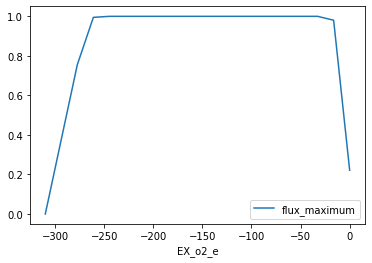

In [37]:
prod_env.plot( kind='line', x='EX_o2_e', y='flux_maximum')

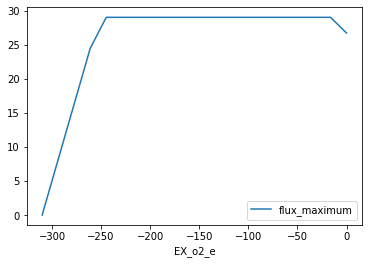

In [38]:
%matplotlib inline
from cobra.flux_analysis import production_envelope

prod_env = production_envelope( model, ["EX_o2_e"], 
            objective="EX_ac_e", carbon_sources="EX_glc__D_e")
prod_env.head()
prod_env.plot( kind='line', x='EX_o2_e', y='flux_maximum');

Building a model
=========

Ahora construiremos nuestra propia red metaolica usando como ejemplo la red metanogénica que vimos en la clase pasada:

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/metanogenesis.png" width="400">

In [39]:
from cobra import Model, Reaction, Metabolite
cobra_model = Model('primordialMetabolism')

# Ractions
E1 = Reaction('E1')
E1.name = 'Exchange reaction of CO2'
E1.subsystem = 'Entrance'
E1.lower_bound = 10.  # This is the default
E1.upper_bound = 1000.  # This is the default
#E1.objective_coefficient = 0. # this is the default

E2 = Reaction('E2')
E2.name = 'Exchange reaction of H2'
E2.subsystem = 'Entrance'
E2.lower_bound = 0.  # This is the default
E2.upper_bound = 1000.  # This is the default
#E2.objective_coefficient = 0. # this is the default

R1 = Reaction('R1')
R1.name = 'First reaction'
R1.subsystem = 'Internal reaction'
R1.lower_bound = 0.  # This is the default
R1.upper_bound = 1000.  # This is the default
#R1.objective_coefficient = 0. # this is the default

R2 = Reaction('R2')
R2.name = 'Second reaction'
R2.subsystem = 'Internal reaction'
R2.lower_bound = 0.  # This is the default
R2.upper_bound = 1000.  # This is the default
#R2.objective_coefficient = 0. # this is the default

R3 = Reaction('R3')
R3.name = 'Third reaction'
R3.subsystem = 'Internal reaction'
R3.lower_bound = 0.  # This is the default
R3.upper_bound = 1000.  # This is the default
#R3.objective_coefficient = 0. # this is the default

E3 = Reaction('E3')
E3.name = 'Exchange reaction of CH4'
E3.subsystem = 'Exit'
E3.lower_bound = 0.  # This is the default
E3.upper_bound = 1000.  # This is the default
#E3.objective_coefficient = 0. # this is the default

E4 = Reaction('E4')
E4.name = 'Exchange reaction of F420'
E4.subsystem = 'Exit'
E4.lower_bound = 0.  # This is the default
E4.upper_bound = 1000.  # This is the default
#E4.objective_coefficient = 1. # this is the default

E5 = Reaction('E5')
E5.name = 'Exchange reaction of H20'
E5.subsystem = 'Exit'
E5.lower_bound = 0.  # This is the default
E5.upper_bound = 1000.  # This is the default
#E5.objective_coefficient = 0. # this is the default


# Agrega el resto de las reacciones

# Metabolites
CO2 = Metabolite('CO2', formula='CO2',name='carbon dioxide',compartment='c')
H2 = Metabolite('H2', formula='H2',name='H2',compartment='c')
F420 = Metabolite('F420', formula='F420',name='F420',compartment='c')
I1 = Metabolite('I1', formula='I1',name='I1',compartment='c')
H2O = Metabolite('H2O', formula='H2O',name='H2O',compartment='c')
CH4 = Metabolite('CH4', formula='CH4',name='CH4',compartment='c')


# Agrega el resto de los metabolitos

# Adding metabolites to reaction
E1.add_metabolites({CO2: 1.0})
E2.add_metabolites({H2: 2.0})
R1.add_metabolites({H2: -2.0,CO2:-1,F420:-1,I1:1})
R2.add_metabolites({I1:-1,H2:-2,CH4:1,F420:1})
R3.add_metabolites({I1:1,CH4:-1,F420:1,H2O:2})
E3.add_metabolites({CH4: -1.0})
E4.add_metabolites({F420: -1})
E5.add_metabolites({H2O: -2})


# ya sabes que hacer :P

# Add reactin to model
cobra_model.add_reaction(E1)
cobra_model.add_reaction(E2)
cobra_model.add_reaction(R1)
cobra_model.add_reaction(R2)
cobra_model.add_reaction(R3)
cobra_model.add_reaction(E3)
cobra_model.add_reaction(E4)
cobra_model.add_reaction(E5)


# lo mismo aquí

cobra_model.objective = 'E3'

Puedes revisar tu modelo con los siguientes comandos

In [40]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in cobra_model.reactions:
    print("%s : %s" % (x.id, x.reaction))
print("Metabolites")
print("-----------")
for x in cobra_model.metabolites:
    print('%s : %s' % (x.id, x.formula))

Reactions
---------
E1 :  --> CO2
E2 :  --> 2.0 H2
R1 : CO2 + F420 + 2.0 H2 --> I1
R2 : 2 H2 + I1 --> CH4 + F420
R3 : CH4 --> F420 + 2 H2O + I1
E3 : CH4 --> 
E4 : F420 --> 
E5 : 2 H2O --> 
Metabolites
-----------
CO2 : CO2
H2 : H2
F420 : F420
I1 : I1
CH4 : CH4
H2O : H2O


Ejercicio
---------

Simula los flujos de esta red metabólica.
    